In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
import io
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [4]:
filepath2 = r"C:\Users\91623\OneDrive\Desktop\projects\bank_curn\bank.csv"
df= pd.read_csv(filepath2)
print(df)

      CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  Num Of Products  Has Credit Card  Is Active Member  \
0          0.00             

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df=df.drop('CustomerId',axis=1)

In [8]:
df.columns = df.columns.str.lower()

In [10]:
unique = [feature for feature in df.columns if len(df[feature].unique())>0 and len(df[feature].unique())<100]
for feature in unique:
    print("{} has {} unique values : {} {}".format(feature,len(df[feature].unique()),df[feature].unique(),"\n"))

geography has 3 unique values : ['France' 'Spain' 'Germany'] 

gender has 2 unique values : ['Female' 'Male'] 

age has 70 unique values : [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83] 

tenure has 11 unique values : [ 2  1  8  7  4  6  3 10  5  9  0] 

num of products has 4 unique values : [1 3 2 4] 

has credit card has 2 unique values : [1 0] 

is active member has 2 unique values : [1 0] 

churn has 2 unique values : [1 0] 



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   surname           10000 non-null  object 
 1   creditscore       10000 non-null  int64  
 2   geography         10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   num of products   10000 non-null  int64  
 8   has credit card   10000 non-null  int64  
 9   is active member  10000 non-null  int64  
 10  estimated salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [15]:
df= df.dropna()

In [16]:
df.describe()

,creditscore,age,tenure,balance,num of products,has credit card,is active member,estimated salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df1=df

<AxesSubplot:ylabel='estimated salary'>

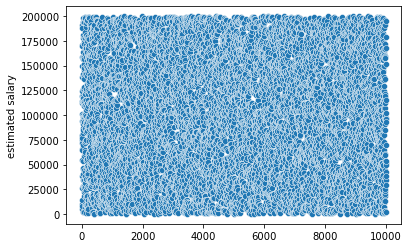

In [19]:
list1=['gender','geography']
for i in list1:
    df1[i]=le.fit_transform(df1[i])

df1.head()

,surname,creditscore,geography,gender,age,tenure,balance,num of products,has credit card,is active member,estimated salary,churn
0,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df1=df1.drop('surname',axis=1)

In [22]:
df1

,creditscore,geography,gender,age,tenure,balance,num of products,has credit card,is active member,estimated salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [23]:
x=df1.drop(['churn'],axis=1)

In [24]:
y=df1['churn']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.25,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7500, 10), (2500, 10), (7500,), (2500,))

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix ,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2012    0]
 [ 488    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2012
           1       0.00      0.00      0.00       488

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.80      0.72      2500



In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix ,classification_report
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[1957   55]
 [ 276  212]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2012
           1       0.79      0.43      0.56       488

    accuracy                           0.87      2500
   macro avg       0.84      0.70      0.74      2500
weighted avg       0.86      0.87      0.85      2500



In [37]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf_pred=clf.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix ,classification_report
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

[[1742  270]
 [ 263  225]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2012
           1       0.45      0.46      0.46       488

    accuracy                           0.79      2500
   macro avg       0.66      0.66      0.66      2500
weighted avg       0.79      0.79      0.79      2500



In [39]:
from sklearn.svm import SVC
svC=SVC()
svC.fit(x_train,y_train)
svC_pred=svC.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix ,classification_report
print(confusion_matrix(y_test,svC_pred))
print(classification_report(y_test,svC_pred))

[[2012    0]
 [ 488    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2012
           1       0.00      0.00      0.00       488

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.45      2500
weighted avg       0.65      0.80      0.72      2500



In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix ,classification_report
print(confusion_matrix(y_test, gnb_pred))
print(classification_report(y_test,gnb_pred))

[[1943   69]
 [ 450   38]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2012
           1       0.36      0.08      0.13       488

    accuracy                           0.79      2500
   macro avg       0.58      0.52      0.50      2500
weighted avg       0.72      0.79      0.73      2500

